In [48]:
from kervis.utils import Model
from kervis.utils import Dataset
from kervis.kernels import VertexHistogram, EdgeHistogram, ShortestPath, Graphlet, WeisfeilerLehman

In [49]:
example = Dataset("example",cmap="Set3", from_TUDataset=False)
example.data = example.data + example.data
example.graphs = example.graphs + example.graphs
example.y = [y for i in range(len(example.y)) for y in example.y]

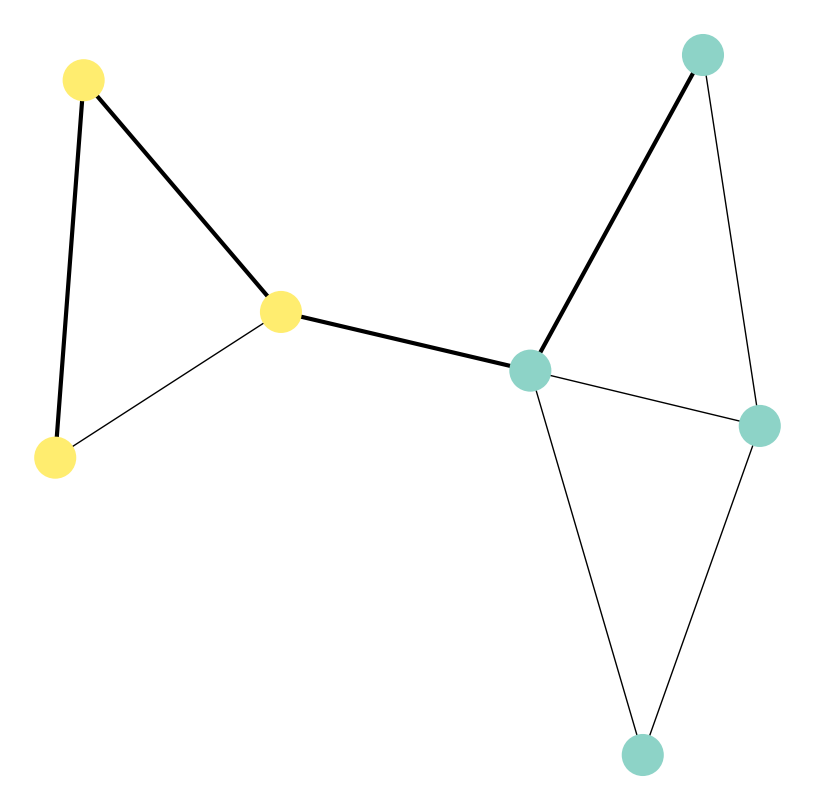

In [50]:
example.plot_graph(0, node_size=200)

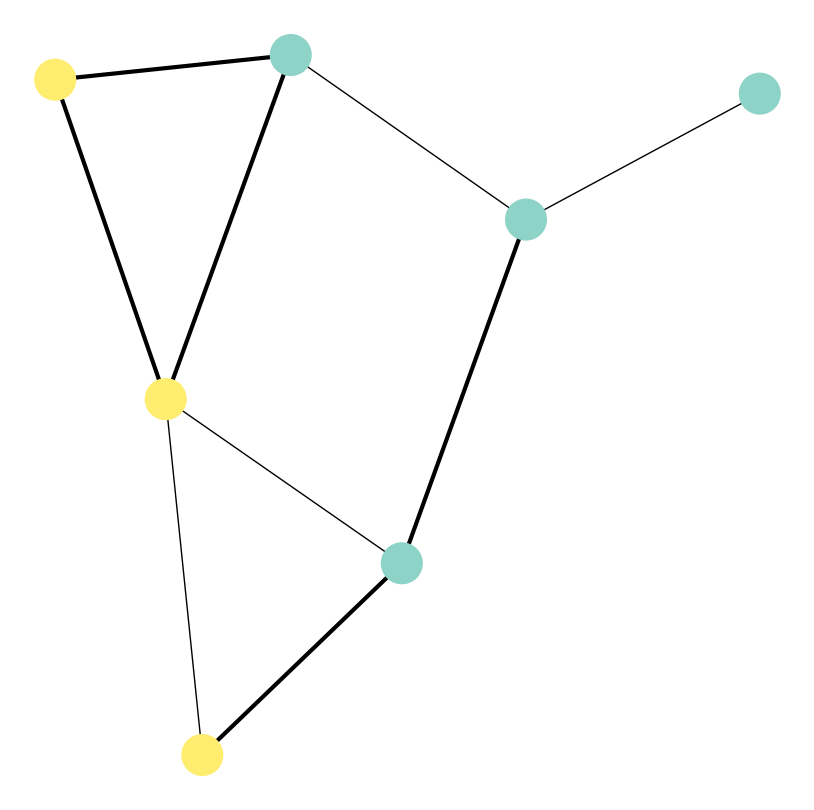

In [51]:
example.plot_graph(1, node_size=200)

In [52]:
example.node_color_map

{0: (0.5529411764705883, 0.8274509803921568, 0.7803921568627451, 1.0),
 1: (1.0, 0.9294117647058824, 0.43529411764705883, 1.0)}

In [53]:
VH = VertexHistogram()
EH = EdgeHistogram()
SP = ShortestPath()
GL = Graphlet(k=3, connected=False)

In [54]:
VH_example = Model(VH, example, "SVM", test_size=0.5)
VH_example.explain("permutation")

EH_example = Model(EH, example, "SVM", test_size=0.5)
EH_example.explain("permutation")

SP_example = Model(SP, example, "SVM", test_size=0.5)
SP_example.explain("permutation")

GL_example = Model(GL, example, "SVM", test_size=0.5)
GL_example.explain("permutation")

In [55]:
print(VH_example.kernel.attributes)
print(VH_example.kernel.X[0])
print(VH_example.kernel.X[1])

[0, 1]
[4. 3.]
[4. 3.]


In [56]:
print(EH_example.kernel.attributes)
print(EH_example.kernel.X[0])
print(EH_example.kernel.X[1])

[0, 1]
[5. 4.]
[4. 5.]


In [57]:
print(SP_example.kernel.attributes)
print(SP_example.kernel.X[0])
print(SP_example.kernel.X[1])

[(0, 1, 3), (1, 1, 2), (0, 0, 2), (0, 1, 2), (0, 0, 1), (1, 1, 1), (0, 1, 1)]
[6. 0. 2. 5. 5. 3. 1.]
[4. 1. 4. 6. 3. 2. 4.]


In [58]:
print(sum(a*b for a,b in zip(SP_example.kernel.X[0], SP_example.kernel.X[1])))

87.0


In [59]:
len(GL_example.kernel.graphlets)

4

In [60]:
print(GL_example.kernel.attributes)
print(GL_example.kernel.X[0])
print(GL_example.kernel.X[1])
print(sum(a*b for a,b in zip(GL_example.kernel.X[0], GL_example.kernel.X[1])))

[0, 1, 2, 3]
[ 3. 22.  7.  3.]
[ 5. 17. 11.  2.]
472.0


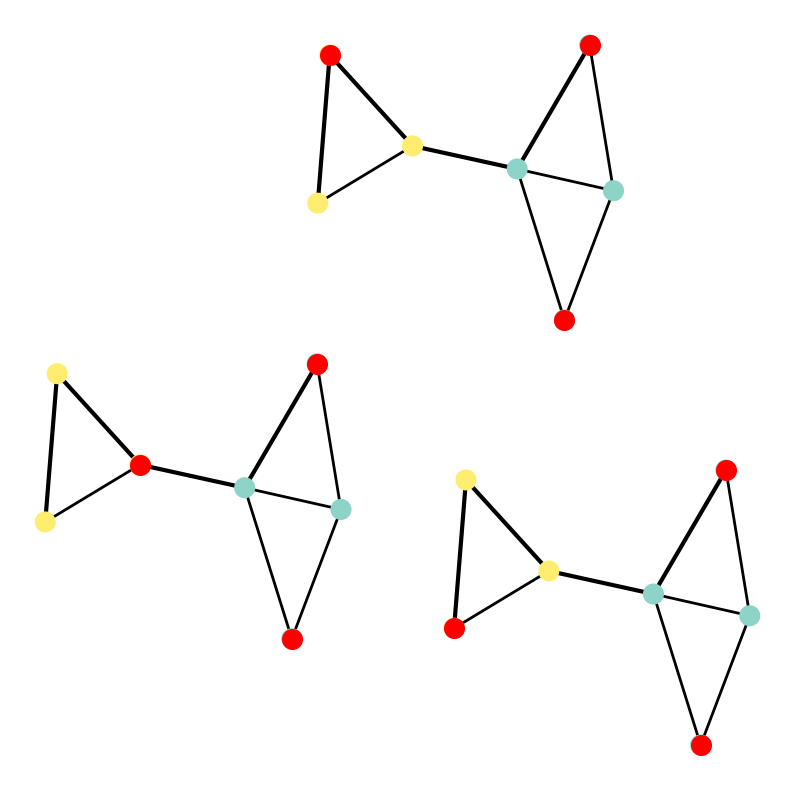

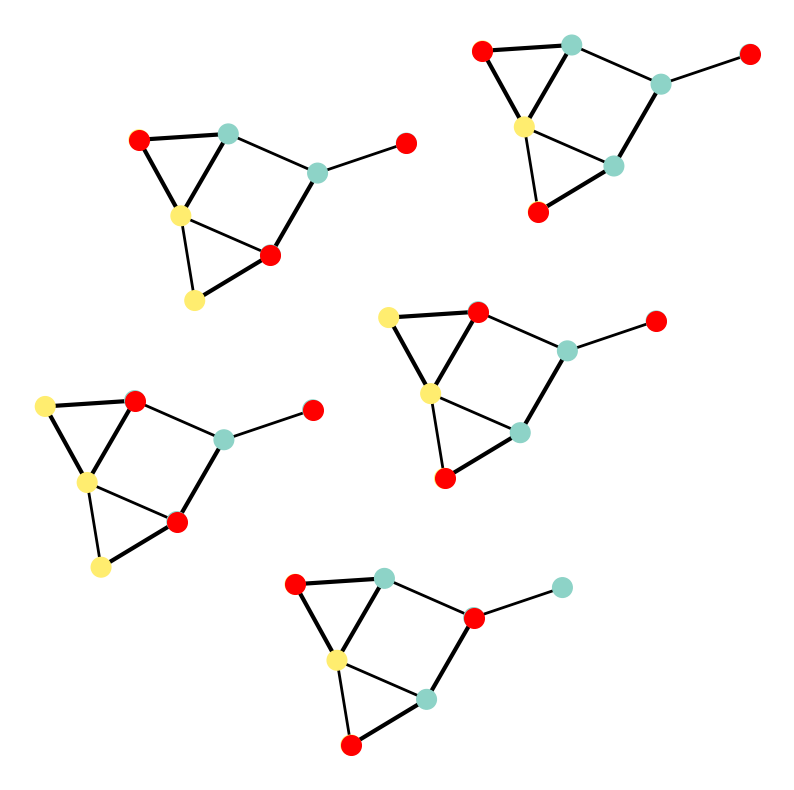

In [61]:
GL_example.highlight_features(0, 0, node_size=200)
GL_example.highlight_features(1, 0, node_size=200)

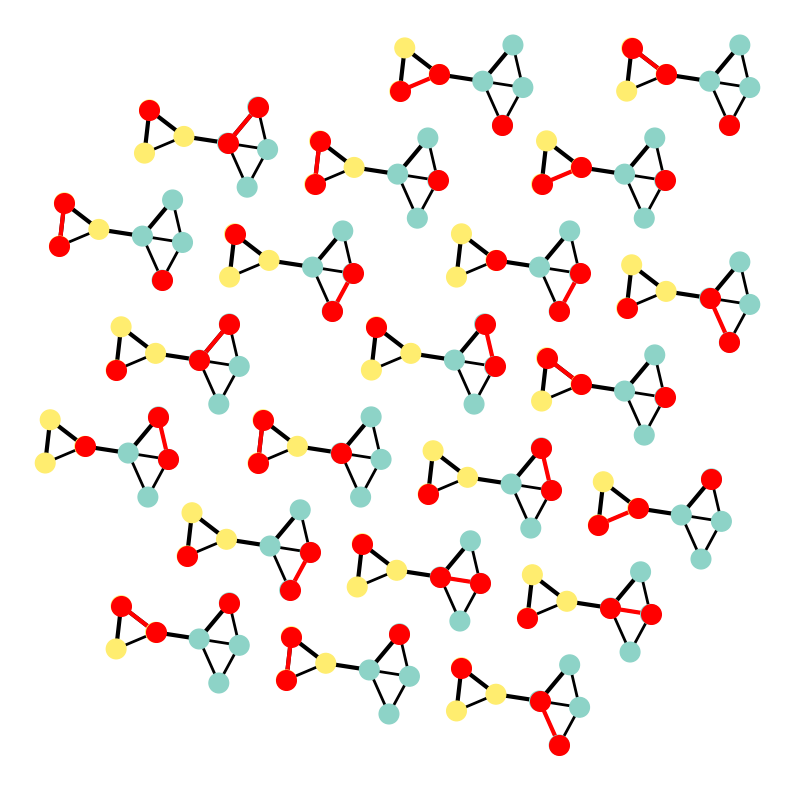

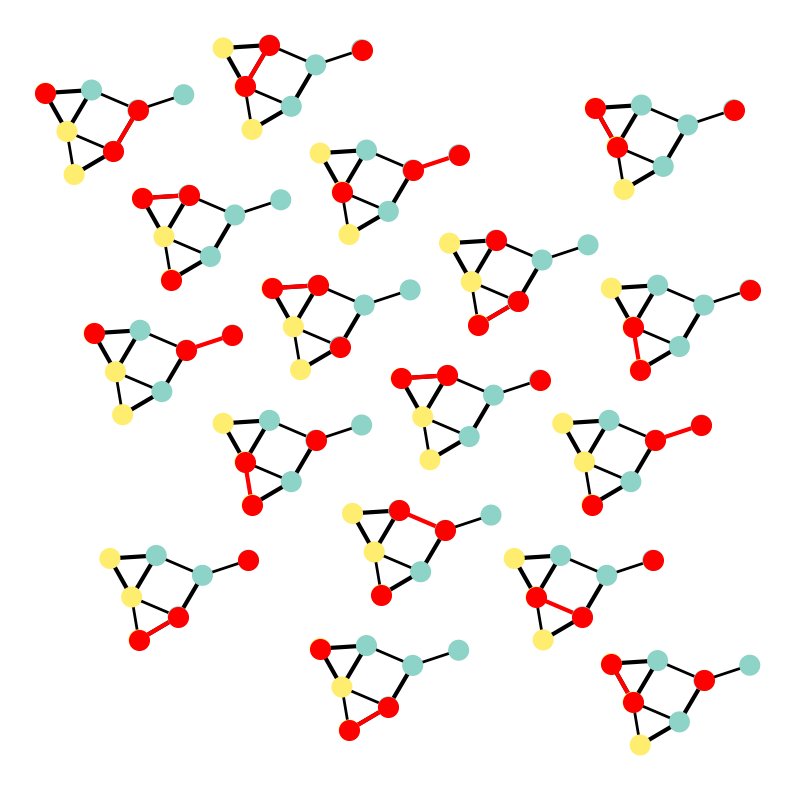

In [62]:
GL_example.highlight_features(0, 1, node_size=200)
GL_example.highlight_features(1, 1, node_size=200)

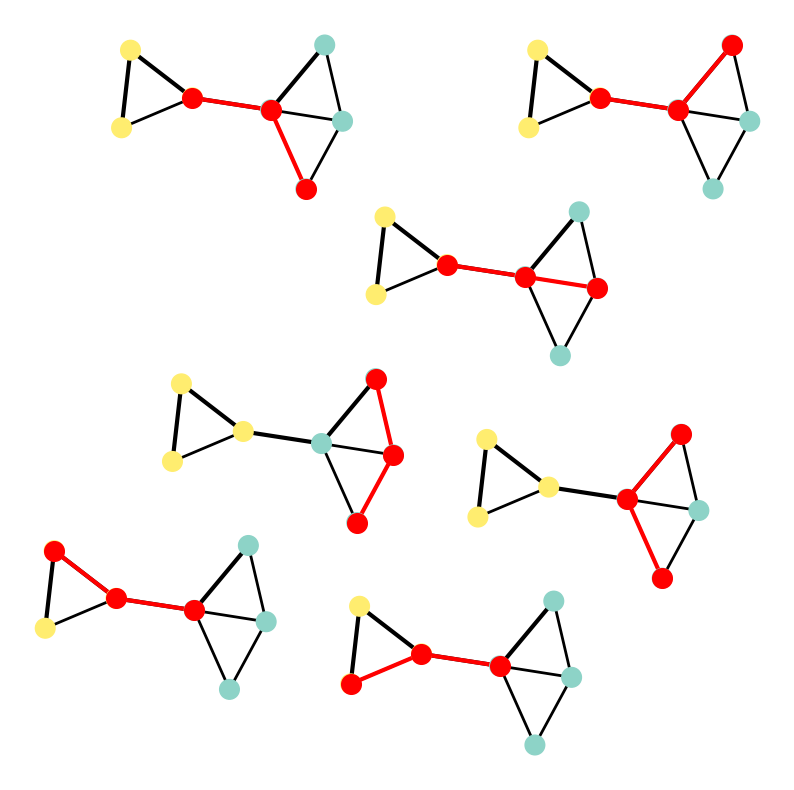

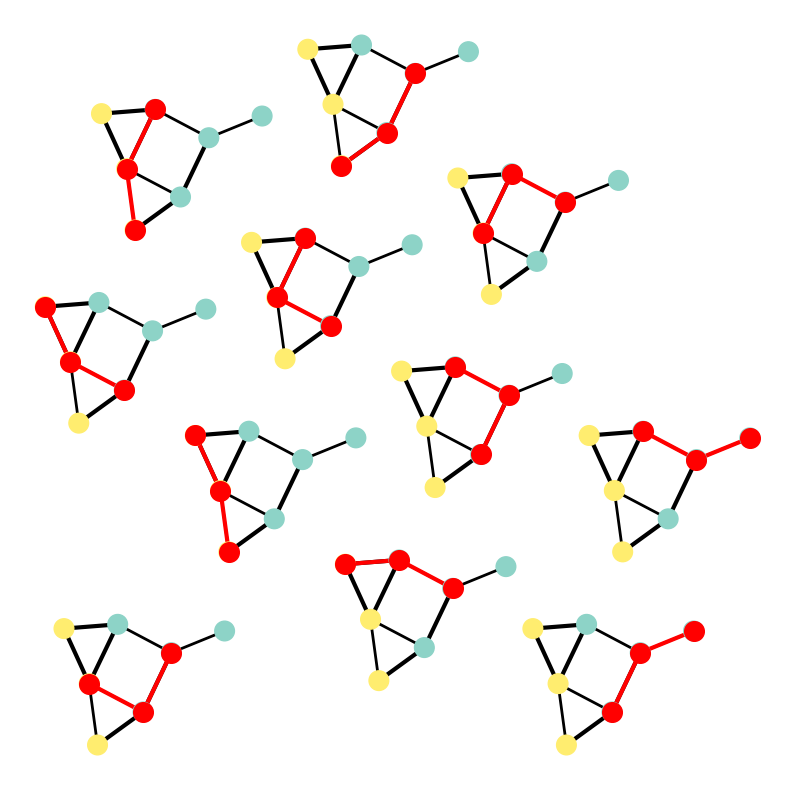

In [63]:
GL_example.highlight_features(0, 2, node_size=200)
GL_example.highlight_features(1, 2, node_size=200)

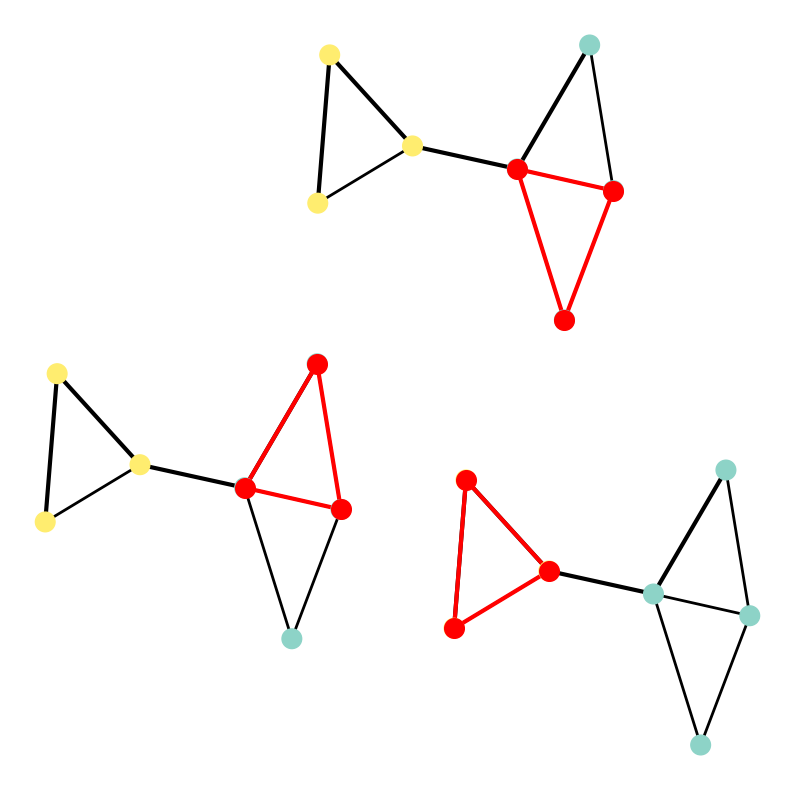

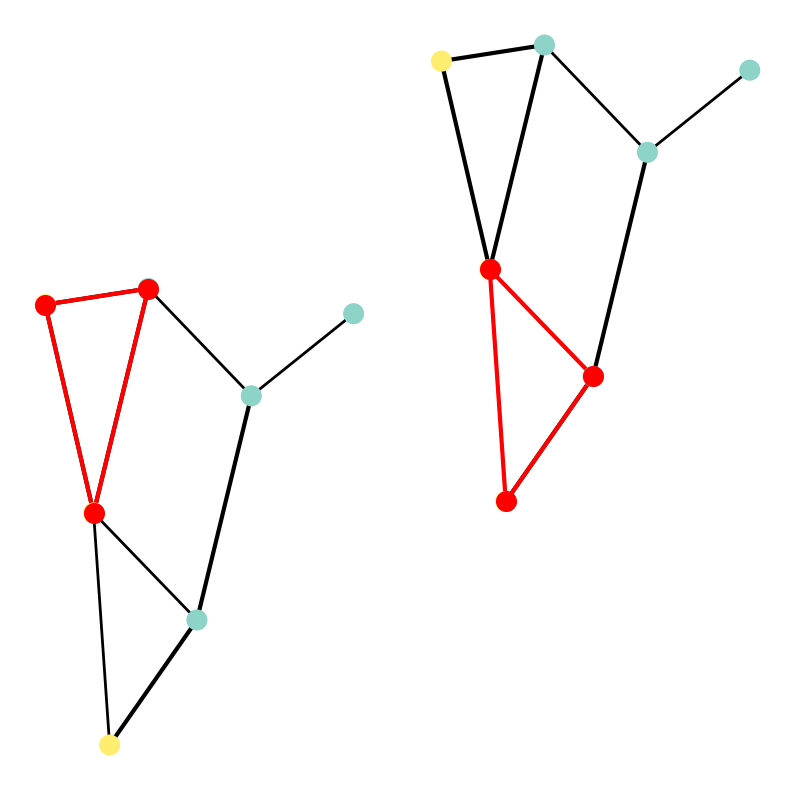

In [64]:
GL_example.highlight_features(0, 3, node_size=200)
GL_example.highlight_features(1, 3, node_size=200)

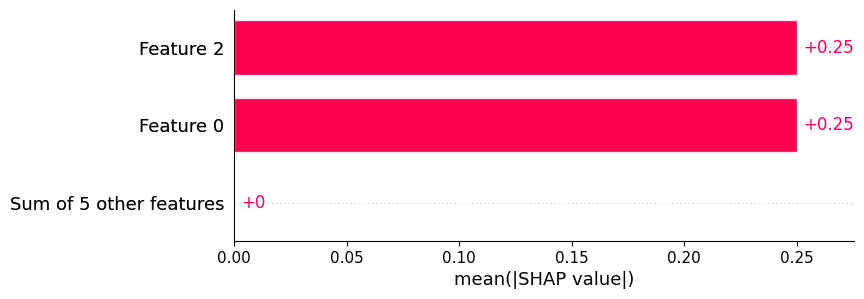

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


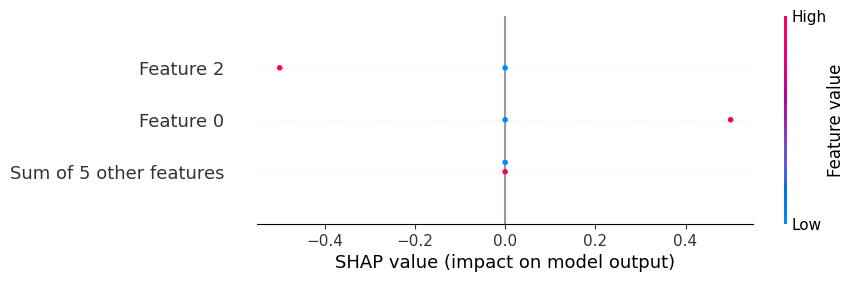

In [65]:
SP_example.bar_plot(max_display=3)
SP_example.summary_plot(max_display=3)

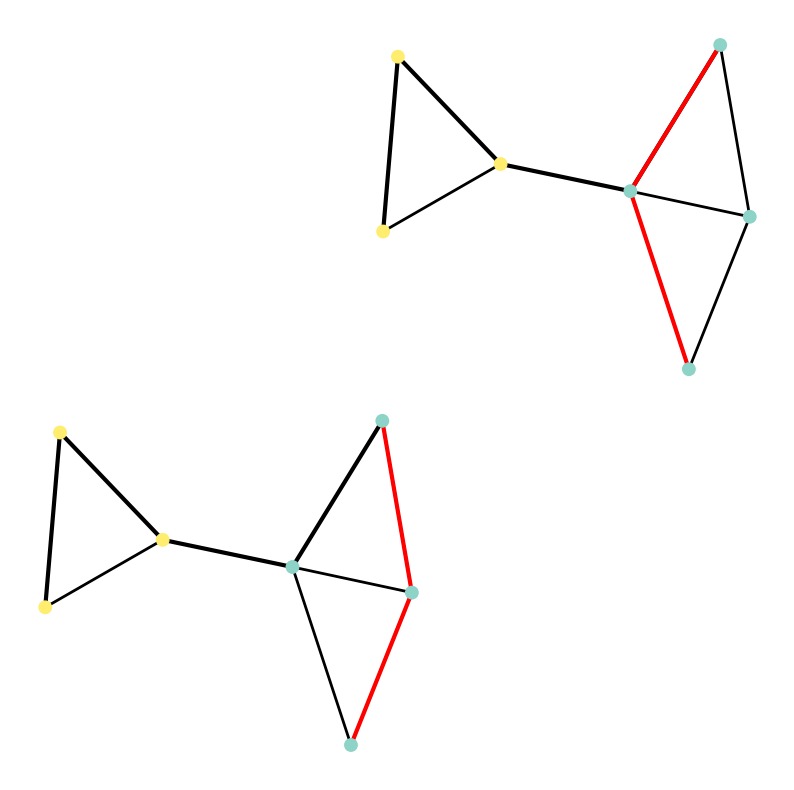

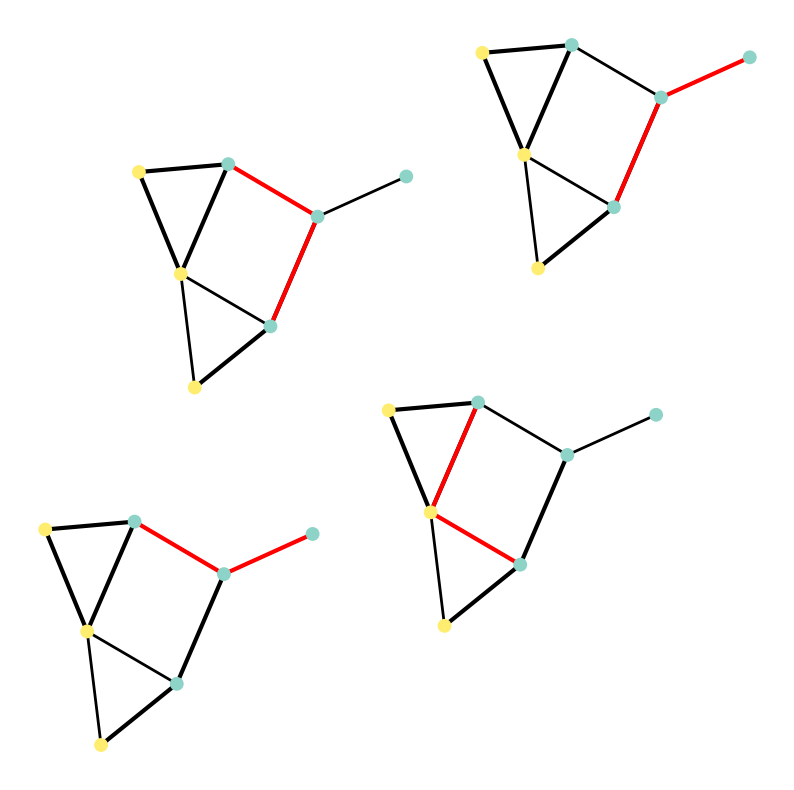

In [69]:
SP_example.highlight_features(0,2)
SP_example.highlight_features(1,2)